In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# download the data
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

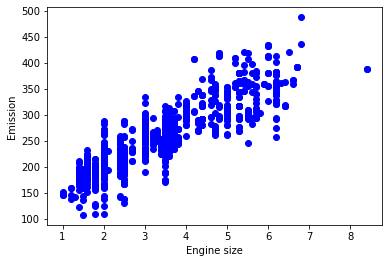

In [2]:
# Reading the data in
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

# select some features that we want to use for regression
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

# plot Emission values with respect to Engine size
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

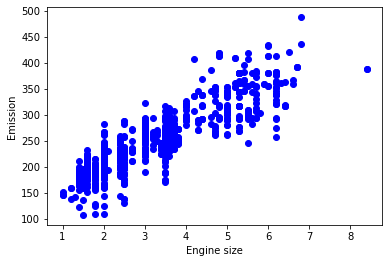

In [3]:
# Creating train and test dataset
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
# Plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [4]:
# TRAIN Multiple Regression Model
# The process is called multiple linear regression. For example, predicting co2emission using: FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars
# Least Squares method tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output (𝑦̂ ) 
# over all samples in the dataset. 1) analytically 2) using an optimization algorithm.
from sklearn import linear_model   # Scikit-learn uses plain Ordinary Least Squares method to solve this problem
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
# y= intercept+(coef1*x1)+(coef2*x2)+(coef3*x3)
# The coefficients
print('Coefficients: ', regr.coef_)
# Intercept
print('Intercept: ', regr.intercept_)

Coefficients:  [[10.56093309  6.84353648 10.07795545]]
Intercept:  [64.33446951]


In [5]:
# We can now estimate y values (prediction) from this regression model
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])  # Estimated target output
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))    # Varianza=MSE=scarto quadratico medio
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))  # Valutazione del metodo di regressione

Residual sum of squares: 616.23
Variance score: 0.85


In [6]:
# TRAIN Multiple Regression Model with other parameters
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)
# We can now estimate y values (prediction) from this multiple linear regression
y_ = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
testx = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
testy = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_ - testy) ** 2))   # Varianza=MSE=scarto quadratico medio
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(testx, testy))

Coefficients:  [[10.70250045  6.30017755  6.90306147  2.72249622]]
Residual sum of squares: 620.36
Variance score: 0.85


Text(0, 0.5, 'Train data Emission')

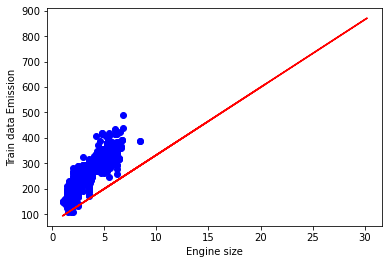

In [13]:
# We can plot the fit line over the data 1

# plt.scatter(train.ENGINESIZE, train.CYLINDERS, train.FUELCONSUMPTION_CITY, train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS, color='blue')
plt.scatter(train.ENGINESIZE,  train.CO2EMISSIONS, color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.coef_[0][1]*x + regr.coef_[0][2]*x + regr.coef_[0][3]*x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Train data Emission")


Text(0, 0.5, 'Train data Emission')

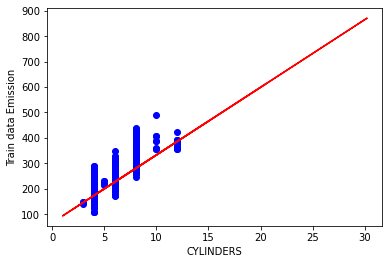

In [14]:
# We can plot the fit line over the data 2

# plt.scatter(train.ENGINESIZE, train.CYLINDERS, train.FUELCONSUMPTION_CITY, train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS, color='blue')
plt.scatter(train.CYLINDERS,  train.CO2EMISSIONS, color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.coef_[0][1]*x + regr.coef_[0][2]*x + regr.coef_[0][3]*x + regr.intercept_[0], '-r')
plt.xlabel("CYLINDERS")
plt.ylabel("Train data Emission")

Text(0, 0.5, 'Train data Emission')

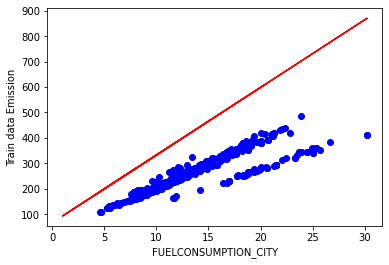

In [12]:
# We can plot the fit line over the data 3

# plt.scatter(train.ENGINESIZE, train.CYLINDERS, train.FUELCONSUMPTION_CITY, train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS, color='blue')
plt.scatter(train.FUELCONSUMPTION_CITY,  train.CO2EMISSIONS, color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.coef_[0][1]*x + regr.coef_[0][2]*x + regr.coef_[0][3]*x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Train data Emission")